# Titanic Dataset from Kaggle - use only train.csv for both training and test set.
Program Flow:
1. Data analysis and data visualization
2. Dataset cleaning
3. Use Scikit Learn perform logistic regression, predict
4. Use Keras implement 4 layers of DNN, perform classfication, and predict
5. Compare the result

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Find out how many missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


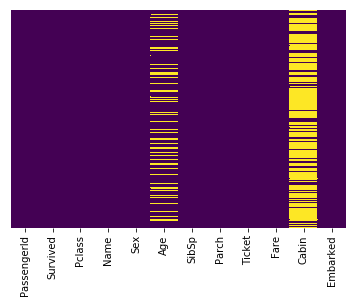

In [6]:
# Create a heap map to take look of the missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Note: missing data in 'Age' is possible for replacement. However, there are a lot data missing in 'Cabin'.

In [7]:
sns.set_style('whitegrid')

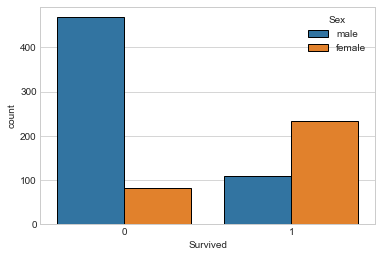

In [8]:
sns.countplot(x='Survived', hue='Sex', data=train)

Note: Female survived more than male.

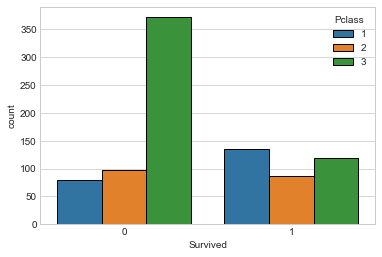

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=train)

Note: a lot people from Pclass 3 were not survived.

C:\Users\HUI-YING LU\Anaconda3\envs\DL_AZ\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


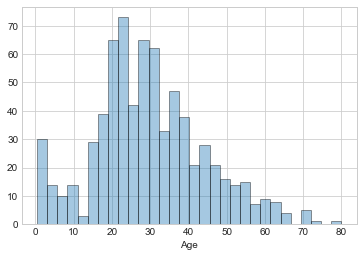

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

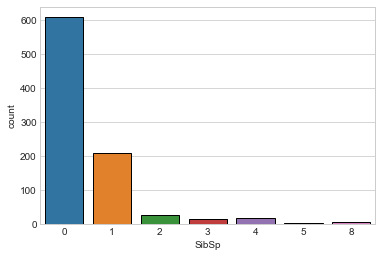

In [13]:
sns.countplot(x='SibSp', data=train)

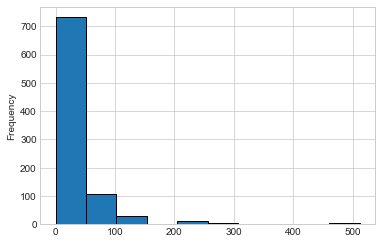

In [14]:
train['Fare'].plot.hist()

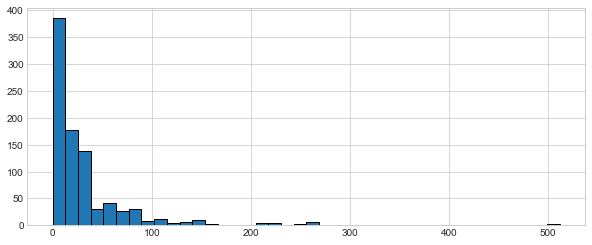

In [15]:
# Looks like a lot people buy cheap tickets (low fare)
train['Fare'].hist(bins=40, figsize=(10,4))

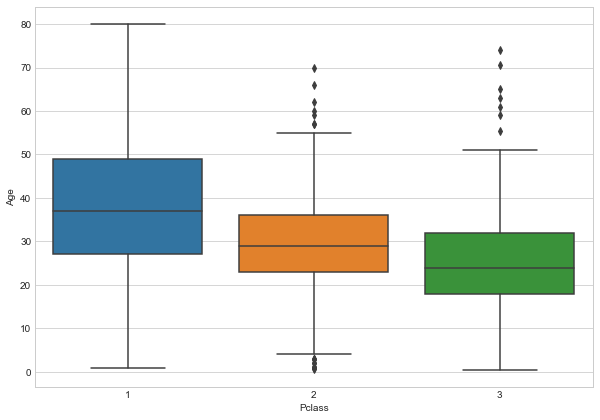

In [16]:
# Compare the age distributions across the people in 3 Pclasses.
# People in 3rd Pclass are younger.
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [17]:
pclass1 = train[train['Pclass'] == 1]
age_p1 = pclass1['Age'].mean()

pclass2 = train[train['Pclass'] == 2]
age_p2 = pclass2['Age'].mean()

pclass3 = train[train['Pclass'] == 3]
age_p3 = pclass3['Age'].mean()

print(age_p1)
print(age_p2)
print(age_p3)

38.233440860215055
29.87763005780347
25.14061971830986


In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return age_p1 # the middle divider line in Pclass 1
        elif Pclass == 2:
            return age_p2 # the middle divider line in Pclass 2
        else:
            return age_p3 # the middle divider line in Pclass 3
    else:
        return Age

In [19]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

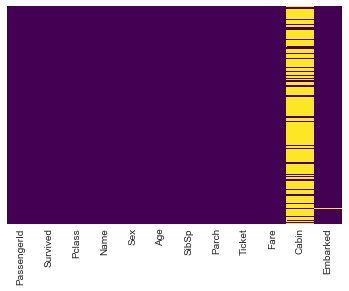

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [21]:
# Check how many missing values in train['Cabin']
train['Cabin'].isnull().sum()

687

In [22]:
# Drop 'Cabin' column since there are too many missing values
train.drop('Cabin', axis=1, inplace=True)

In [23]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C


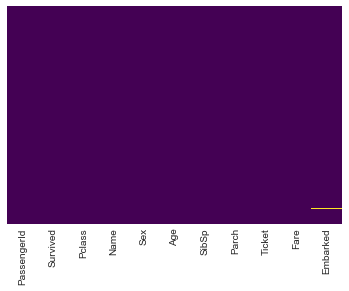

In [24]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
# Check how many missing values in 'Embarked' column
train['Embarked'].isnull().sum()

2

In [26]:
train.dropna(inplace=True)

In [27]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [28]:
sex

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [29]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [30]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [31]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [32]:
train = pd.concat([train, sex, embark], axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [34]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [35]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.00000,1,0,7.2500,1,0,1
1,2,1,1,38.00000,1,0,71.2833,0,0,0
2,3,1,3,26.00000,0,0,7.9250,0,0,1
3,4,1,1,35.00000,1,0,53.1000,0,0,1
4,5,0,3,35.00000,0,0,8.0500,1,0,1
5,6,0,3,25.14062,0,0,8.4583,1,1,0
6,7,0,1,54.00000,0,0,51.8625,1,0,1
7,8,0,3,2.00000,3,1,21.0750,1,0,1
8,9,1,3,27.00000,0,2,11.1333,0,0,1
9,10,1,2,14.00000,1,0,30.0708,0,0,0


In [36]:
train.drop('PassengerId', axis=1, inplace=True)

In [37]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
X = train.drop('Survived', axis=1)

In [39]:
y = train['Survived']

In [40]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.00000,1,0,7.2500,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0
2,3,26.00000,0,0,7.9250,0,0,1
3,1,35.00000,1,0,53.1000,0,0,1
4,3,35.00000,0,0,8.0500,1,0,1
5,3,25.14062,0,0,8.4583,1,1,0
6,1,54.00000,0,0,51.8625,1,0,1
7,3,2.00000,3,1,21.0750,1,0,1
8,3,27.00000,0,2,11.1333,0,0,1
9,2,14.00000,1,0,30.0708,0,0,0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()

In [45]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
predictions = logmodel.predict(X_test)

In [47]:
logmodel.coef_

array([[-7.87200439e-01, -2.62339398e-02, -2.17656957e-01,
        -8.75523853e-02,  4.68113971e-03, -2.32173918e+00,
        -7.75987035e-04, -1.70470982e-01]])

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [50]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
X_train

array([[ 0.82581213, -0.87836968, -0.48408036, ..., -1.33296126,
        -0.30519808,  0.61327497],
       [-0.36320441, -0.87836968, -0.48408036, ..., -1.33296126,
        -0.30519808,  0.61327497],
       [ 0.82581213, -0.25572559, -0.48408036, ..., -1.33296126,
        -0.30519808,  0.61327497],
       ...,
       [ 0.82581213,  1.22305412, -0.48408036, ...,  0.75020935,
        -0.30519808,  0.61327497],
       [ 0.82581213, -0.3226116 , -0.48408036, ...,  0.75020935,
        -0.30519808, -1.63058993],
       [-0.36320441,  0.98956259, -0.48408036, ..., -1.33296126,
        -0.30519808,  0.61327497]])

In [53]:
X_test

array([[ 0.82581213, -0.3226116 , -0.48408036, ...,  0.75020935,
        -0.30519808,  0.61327497],
       [ 0.82581213, -0.3226116 , -0.48408036, ...,  0.75020935,
         3.27656055, -1.63058993],
       [-0.36320441, -0.41138661,  0.43953309, ..., -1.33296126,
        -0.30519808,  0.61327497],
       ...,
       [-0.36320441,  0.04607234, -0.48408036, ...,  0.75020935,
        -0.30519808,  0.61327497],
       [-1.55222095,  0.69640937,  0.43953309, ..., -1.33296126,
        -0.30519808,  0.61327497],
       [ 0.82581213, -1.57884428,  2.28675998, ..., -1.33296126,
        -0.30519808,  0.61327497]])

In [54]:
import keras

C:\Users\HUI-YING LU\Anaconda3\envs\DL_AZ\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [55]:
from keras.models import Sequential
from keras.layers import Dense

In [56]:
# Use the cell in the bottom (GridSearch) to find best batch size and epoch. Perform the classification and predict
# Using best batch size and epoch

classifier = Sequential()
# Add input layer and first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim = 8))

# Add second hidden layer, input to the hidden layer is given by previous output layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Add third hidden layer, input to the hidden layer is given by previous output layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Add the output layer, input to the hidden layer is given by previous output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model
classifier.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fit the model
classifier.fit(X_train, y_train, batch_size = 32, epochs=2000)

Epoch 1/2000
622/622 [==============================] - 1s 1ms/step - loss: 0.6920 - acc: 0.6158
Epoch 2/2000
622/622 [==============================] - 0s 97us/step - loss: 0.6899 - acc: 0.6206
Epoch 3/2000
622/622 [==============================] - 0s 84us/step - loss: 0.6868 - acc: 0.6206
Epoch 4/2000
622/622 [==============================] - 0s 98us/step - loss: 0.6828 - acc: 0.6206
Epoch 5/2000
622/622 [==============================] - 0s 101us/step - loss: 0.6768 - acc: 0.6206
Epoch 6/2000
622/622 [==============================] - 0s 130us/step - loss: 0.6667 - acc: 0.6206
Epoch 7/2000
622/622 [==============================] - 0s 113us/step - loss: 0.6495 - acc: 0.6206
Epoch 8/2000
622/622 [==============================] - 0s 127us/step - loss: 0.6257 - acc: 0.6206
Epoch 9/2000
622/622 [==============================] - 0s 124us/step - loss: 0.5981 - acc: 0.6206
Epoch 10/2000
622/622 [==============================] - 0s 143us/step - loss: 0.5764 - acc: 0.6206
Epoch 11/2000


622/622 [==============================] - 0s 85us/step - loss: 0.4580 - acc: 0.8135
Epoch 84/2000
622/622 [==============================] - 0s 95us/step - loss: 0.4576 - acc: 0.8119
Epoch 85/2000
622/622 [==============================] - 0s 103us/step - loss: 0.4572 - acc: 0.8103
Epoch 86/2000
622/622 [==============================] - 0s 106us/step - loss: 0.4565 - acc: 0.8103
Epoch 87/2000
622/622 [==============================] - 0s 113us/step - loss: 0.4562 - acc: 0.8103
Epoch 88/2000
622/622 [==============================] - 0s 108us/step - loss: 0.4557 - acc: 0.8087
Epoch 89/2000
622/622 [==============================] - 0s 114us/step - loss: 0.4552 - acc: 0.8103
Epoch 90/2000
622/622 [==============================] - 0s 106us/step - loss: 0.4550 - acc: 0.8103
Epoch 91/2000
622/622 [==============================] - 0s 108us/step - loss: 0.4539 - acc: 0.8103
Epoch 92/2000
622/622 [==============================] - 0s 118us/step - loss: 0.4541 - acc: 0.8103
Epoch 93/2000
62

622/622 [==============================] - 0s 87us/step - loss: 0.4278 - acc: 0.8264
Epoch 165/2000
622/622 [==============================] - 0s 85us/step - loss: 0.4273 - acc: 0.8312
Epoch 166/2000
622/622 [==============================] - 0s 95us/step - loss: 0.4267 - acc: 0.8296
Epoch 167/2000
622/622 [==============================] - 0s 101us/step - loss: 0.4276 - acc: 0.8280
Epoch 168/2000
622/622 [==============================] - 0s 113us/step - loss: 0.4268 - acc: 0.8280
Epoch 169/2000
622/622 [==============================] - 0s 121us/step - loss: 0.4257 - acc: 0.8296
Epoch 170/2000
622/622 [==============================] - 0s 121us/step - loss: 0.4255 - acc: 0.8312
Epoch 171/2000
622/622 [==============================] - 0s 114us/step - loss: 0.4249 - acc: 0.8296
Epoch 172/2000
622/622 [==============================] - 0s 119us/step - loss: 0.4252 - acc: 0.8312
Epoch 173/2000
622/622 [==============================] - 0s 119us/step - loss: 0.4250 - acc: 0.8312
Epoch 17

622/622 [==============================] - 0s 85us/step - loss: 0.4114 - acc: 0.8328
Epoch 246/2000
622/622 [==============================] - 0s 93us/step - loss: 0.4116 - acc: 0.8344
Epoch 247/2000
622/622 [==============================] - 0s 97us/step - loss: 0.4102 - acc: 0.8312
Epoch 248/2000
622/622 [==============================] - 0s 101us/step - loss: 0.4105 - acc: 0.8280
Epoch 249/2000
622/622 [==============================] - 0s 129us/step - loss: 0.4100 - acc: 0.8312
Epoch 250/2000
622/622 [==============================] - 0s 121us/step - loss: 0.4097 - acc: 0.8312
Epoch 251/2000
622/622 [==============================] - 0s 129us/step - loss: 0.4108 - acc: 0.8280
Epoch 252/2000
622/622 [==============================] - 0s 124us/step - loss: 0.4101 - acc: 0.8344
Epoch 253/2000
622/622 [==============================] - 0s 119us/step - loss: 0.4100 - acc: 0.8328
Epoch 254/2000
622/622 [==============================] - 0s 143us/step - loss: 0.4097 - acc: 0.8296
Epoch 25

622/622 [==============================] - 0s 97us/step - loss: 0.4041 - acc: 0.8264
Epoch 327/2000
622/622 [==============================] - 0s 90us/step - loss: 0.4037 - acc: 0.8248
Epoch 328/2000
622/622 [==============================] - 0s 89us/step - loss: 0.4037 - acc: 0.8296
Epoch 329/2000
622/622 [==============================] - 0s 100us/step - loss: 0.4044 - acc: 0.8280
Epoch 330/2000
622/622 [==============================] - 0s 105us/step - loss: 0.4044 - acc: 0.8232
Epoch 331/2000
622/622 [==============================] - 0s 108us/step - loss: 0.4037 - acc: 0.8264
Epoch 332/2000
622/622 [==============================] - 0s 108us/step - loss: 0.4032 - acc: 0.8280
Epoch 333/2000
622/622 [==============================] - 0s 108us/step - loss: 0.4029 - acc: 0.8264
Epoch 334/2000
622/622 [==============================] - 0s 109us/step - loss: 0.4032 - acc: 0.8280
Epoch 335/2000
622/622 [==============================] - 0s 113us/step - loss: 0.4037 - acc: 0.8280
Epoch 33

622/622 [==============================] - 0s 87us/step - loss: 0.3984 - acc: 0.8296
Epoch 408/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3997 - acc: 0.8344
Epoch 409/2000
622/622 [==============================] - 0s 97us/step - loss: 0.3987 - acc: 0.8360
Epoch 410/2000
622/622 [==============================] - 0s 101us/step - loss: 0.3985 - acc: 0.8344
Epoch 411/2000
622/622 [==============================] - 0s 101us/step - loss: 0.3984 - acc: 0.8312
Epoch 412/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3984 - acc: 0.8344
Epoch 413/2000
622/622 [==============================] - 0s 121us/step - loss: 0.3986 - acc: 0.8360
Epoch 414/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3983 - acc: 0.8344
Epoch 415/2000
622/622 [==============================] - 0s 109us/step - loss: 0.3987 - acc: 0.8328
Epoch 416/2000
622/622 [==============================] - 0s 109us/step - loss: 0.3985 - acc: 0.8360
Epoch 41

622/622 [==============================] - 0s 97us/step - loss: 0.3953 - acc: 0.8328
Epoch 489/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3957 - acc: 0.8360
Epoch 490/2000
622/622 [==============================] - 0s 100us/step - loss: 0.3955 - acc: 0.8344
Epoch 491/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3955 - acc: 0.8360
Epoch 492/2000
622/622 [==============================] - 0s 98us/step - loss: 0.3955 - acc: 0.8344
Epoch 493/2000
622/622 [==============================] - 0s 145us/step - loss: 0.3956 - acc: 0.8360
Epoch 494/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3952 - acc: 0.8312
Epoch 495/2000
622/622 [==============================] - 0s 127us/step - loss: 0.3962 - acc: 0.8344
Epoch 496/2000
622/622 [==============================] - 0s 132us/step - loss: 0.3951 - acc: 0.8344
Epoch 497/2000
622/622 [==============================] - 0s 130us/step - loss: 0.3952 - acc: 0.8344
Epoch 4

622/622 [==============================] - 0s 143us/step - loss: 0.3939 - acc: 0.8312
Epoch 570/2000
622/622 [==============================] - 0s 143us/step - loss: 0.3941 - acc: 0.8328
Epoch 571/2000
622/622 [==============================] - 0s 132us/step - loss: 0.3939 - acc: 0.8312
Epoch 572/2000
622/622 [==============================] - 0s 153us/step - loss: 0.3936 - acc: 0.8328
Epoch 573/2000
622/622 [==============================] - 0s 153us/step - loss: 0.3939 - acc: 0.8392
Epoch 574/2000
622/622 [==============================] - 0s 132us/step - loss: 0.3949 - acc: 0.8360
Epoch 575/2000
622/622 [==============================] - 0s 143us/step - loss: 0.3935 - acc: 0.8328 0s - loss: 0.3799 - acc: 0.834
Epoch 576/2000
622/622 [==============================] - 0s 150us/step - loss: 0.3937 - acc: 0.8344
Epoch 577/2000
622/622 [==============================] - 0s 137us/step - loss: 0.3936 - acc: 0.8376
Epoch 578/2000
622/622 [==============================] - 0s 132us/step - l

622/622 [==============================] - 0s 109us/step - loss: 0.3923 - acc: 0.8344
Epoch 650/2000
622/622 [==============================] - 0s 111us/step - loss: 0.3921 - acc: 0.8376
Epoch 651/2000
622/622 [==============================] - 0s 126us/step - loss: 0.3918 - acc: 0.8376
Epoch 652/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3926 - acc: 0.8408
Epoch 653/2000
622/622 [==============================] - 0s 134us/step - loss: 0.3923 - acc: 0.8408
Epoch 654/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3928 - acc: 0.8344
Epoch 655/2000
622/622 [==============================] - 0s 114us/step - loss: 0.3921 - acc: 0.8360
Epoch 656/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3926 - acc: 0.8360
Epoch 657/2000
622/622 [==============================] - 0s 105us/step - loss: 0.3927 - acc: 0.8360
Epoch 658/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3938 - acc: 0.8344
Epoch

622/622 [==============================] - 0s 103us/step - loss: 0.3912 - acc: 0.8408
Epoch 731/2000
622/622 [==============================] - 0s 109us/step - loss: 0.3911 - acc: 0.8392
Epoch 732/2000
622/622 [==============================] - 0s 98us/step - loss: 0.3908 - acc: 0.8392
Epoch 733/2000
622/622 [==============================] - 0s 100us/step - loss: 0.3908 - acc: 0.8392
Epoch 734/2000
622/622 [==============================] - 0s 114us/step - loss: 0.3910 - acc: 0.8392
Epoch 735/2000
622/622 [==============================] - 0s 121us/step - loss: 0.3923 - acc: 0.8376
Epoch 736/2000
622/622 [==============================] - 0s 127us/step - loss: 0.3929 - acc: 0.8392
Epoch 737/2000
622/622 [==============================] - 0s 108us/step - loss: 0.3912 - acc: 0.8424
Epoch 738/2000
622/622 [==============================] - 0s 98us/step - loss: 0.3917 - acc: 0.8344
Epoch 739/2000
622/622 [==============================] - 0s 108us/step - loss: 0.3909 - acc: 0.8376
Epoch 7

622/622 [==============================] - 0s 82us/step - loss: 0.3906 - acc: 0.8424
Epoch 812/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3904 - acc: 0.8408
Epoch 813/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3899 - acc: 0.8376
Epoch 814/2000
622/622 [==============================] - 0s 95us/step - loss: 0.3903 - acc: 0.8376
Epoch 815/2000
622/622 [==============================] - 0s 97us/step - loss: 0.3914 - acc: 0.8408
Epoch 816/2000
622/622 [==============================] - 0s 97us/step - loss: 0.3897 - acc: 0.8408
Epoch 817/2000
622/622 [==============================] - 0s 100us/step - loss: 0.3903 - acc: 0.8424
Epoch 818/2000
622/622 [==============================] - 0s 108us/step - loss: 0.3918 - acc: 0.8376
Epoch 819/2000
622/622 [==============================] - 0s 114us/step - loss: 0.3898 - acc: 0.8424
Epoch 820/2000
622/622 [==============================] - 0s 111us/step - loss: 0.3904 - acc: 0.8424
Epoch 821/

622/622 [==============================] - 0s 106us/step - loss: 0.3898 - acc: 0.8376
Epoch 893/2000
622/622 [==============================] - 0s 101us/step - loss: 0.3899 - acc: 0.8376
Epoch 894/2000
622/622 [==============================] - 0s 111us/step - loss: 0.3893 - acc: 0.8392
Epoch 895/2000
622/622 [==============================] - 0s 148us/step - loss: 0.3896 - acc: 0.8392
Epoch 896/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3902 - acc: 0.8441
Epoch 897/2000
622/622 [==============================] - 0s 126us/step - loss: 0.3910 - acc: 0.8360
Epoch 898/2000
622/622 [==============================] - 0s 121us/step - loss: 0.3904 - acc: 0.8424
Epoch 899/2000
622/622 [==============================] - 0s 132us/step - loss: 0.3902 - acc: 0.8408
Epoch 900/2000
622/622 [==============================] - 0s 126us/step - loss: 0.3891 - acc: 0.8408
Epoch 901/2000
622/622 [==============================] - 0s 109us/step - loss: 0.3892 - acc: 0.8441
Epoch

Epoch 973/2000
622/622 [==============================] - 0s 97us/step - loss: 0.3884 - acc: 0.8424
Epoch 974/2000
622/622 [==============================] - 0s 101us/step - loss: 0.3891 - acc: 0.8457
Epoch 975/2000
622/622 [==============================] - 0s 90us/step - loss: 0.3897 - acc: 0.8424
Epoch 976/2000
622/622 [==============================] - 0s 100us/step - loss: 0.3893 - acc: 0.8360
Epoch 977/2000
622/622 [==============================] - 0s 118us/step - loss: 0.3892 - acc: 0.8408
Epoch 978/2000
622/622 [==============================] - 0s 121us/step - loss: 0.3893 - acc: 0.8441
Epoch 979/2000
622/622 [==============================] - 0s 114us/step - loss: 0.3893 - acc: 0.8360
Epoch 980/2000
622/622 [==============================] - 0s 90us/step - loss: 0.3891 - acc: 0.8441
Epoch 981/2000
622/622 [==============================] - 0s 111us/step - loss: 0.3884 - acc: 0.8408
Epoch 982/2000
622/622 [==============================] - 0s 109us/step - loss: 0.3888 - acc: 

Epoch 1054/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3883 - acc: 0.8408
Epoch 1055/2000
622/622 [==============================] - 0s 97us/step - loss: 0.3885 - acc: 0.8424
Epoch 1056/2000
622/622 [==============================] - 0s 118us/step - loss: 0.3882 - acc: 0.8457
Epoch 1057/2000
622/622 [==============================] - 0s 118us/step - loss: 0.3883 - acc: 0.8441
Epoch 1058/2000
622/622 [==============================] - 0s 118us/step - loss: 0.3883 - acc: 0.8408
Epoch 1059/2000
622/622 [==============================] - 0s 108us/step - loss: 0.3878 - acc: 0.8408
Epoch 1060/2000
622/622 [==============================] - 0s 109us/step - loss: 0.3882 - acc: 0.8360
Epoch 1061/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3880 - acc: 0.8408
Epoch 1062/2000
622/622 [==============================] - 0s 126us/step - loss: 0.3885 - acc: 0.8344
Epoch 1063/2000
622/622 [==============================] - 0s 145us/step - loss: 0.3

622/622 [==============================] - 0s 90us/step - loss: 0.3877 - acc: 0.8424
Epoch 1135/2000
622/622 [==============================] - 0s 100us/step - loss: 0.3880 - acc: 0.8408
Epoch 1136/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3886 - acc: 0.8424
Epoch 1137/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3890 - acc: 0.8424
Epoch 1138/2000
622/622 [==============================] - 0s 134us/step - loss: 0.3880 - acc: 0.8424
Epoch 1139/2000
622/622 [==============================] - 0s 124us/step - loss: 0.3884 - acc: 0.8424
Epoch 1140/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3878 - acc: 0.8424
Epoch 1141/2000
622/622 [==============================] - 0s 130us/step - loss: 0.3886 - acc: 0.8441
Epoch 1142/2000
622/622 [==============================] - 0s 109us/step - loss: 0.3886 - acc: 0.8408
Epoch 1143/2000
622/622 [==============================] - 0s 118us/step - loss: 0.3881 - acc: 0.84

622/622 [==============================] - 0s 98us/step - loss: 0.3884 - acc: 0.8360
Epoch 1215/2000
622/622 [==============================] - 0s 98us/step - loss: 0.3879 - acc: 0.8392
Epoch 1216/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3876 - acc: 0.8376
Epoch 1217/2000
622/622 [==============================] - 0s 140us/step - loss: 0.3896 - acc: 0.8376
Epoch 1218/2000
622/622 [==============================] - 0s 108us/step - loss: 0.3875 - acc: 0.8424
Epoch 1219/2000
622/622 [==============================] - 0s 97us/step - loss: 0.3883 - acc: 0.8392
Epoch 1220/2000
622/622 [==============================] - 0s 134us/step - loss: 0.3887 - acc: 0.8328
Epoch 1221/2000
622/622 [==============================] - 0s 143us/step - loss: 0.3878 - acc: 0.8424
Epoch 1222/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3877 - acc: 0.8424
Epoch 1223/2000
622/622 [==============================] - 0s 105us/step - loss: 0.3873 - acc: 0.8408

622/622 [==============================] - 0s 111us/step - loss: 0.3874 - acc: 0.8424
Epoch 1295/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3879 - acc: 0.8392
Epoch 1296/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3873 - acc: 0.8408
Epoch 1297/2000
622/622 [==============================] - 0s 111us/step - loss: 0.3879 - acc: 0.8392
Epoch 1298/2000
622/622 [==============================] - 0s 134us/step - loss: 0.3877 - acc: 0.8424
Epoch 1299/2000
622/622 [==============================] - ETA: 0s - loss: 0.3573 - acc: 0.856 - 0s 132us/step - loss: 0.3886 - acc: 0.8408
Epoch 1300/2000
622/622 [==============================] - 0s 137us/step - loss: 0.3869 - acc: 0.8392
Epoch 1301/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3876 - acc: 0.8424
Epoch 1302/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3880 - acc: 0.8392
Epoch 1303/2000
622/622 [==============================] - 0

622/622 [==============================] - 0s 130us/step - loss: 0.3867 - acc: 0.8457
Epoch 1374/2000
622/622 [==============================] - 0s 114us/step - loss: 0.3878 - acc: 0.8376
Epoch 1375/2000
622/622 [==============================] - 0s 130us/step - loss: 0.3884 - acc: 0.8424
Epoch 1376/2000
622/622 [==============================] - 0s 132us/step - loss: 0.3877 - acc: 0.8441
Epoch 1377/2000
622/622 [==============================] - 0s 134us/step - loss: 0.3878 - acc: 0.8408
Epoch 1378/2000
622/622 [==============================] - 0s 124us/step - loss: 0.3875 - acc: 0.8376
Epoch 1379/2000
622/622 [==============================] - 0s 142us/step - loss: 0.3870 - acc: 0.8392
Epoch 1380/2000
622/622 [==============================] - 0s 134us/step - loss: 0.3883 - acc: 0.8424
Epoch 1381/2000
622/622 [==============================] - 0s 127us/step - loss: 0.3871 - acc: 0.8328
Epoch 1382/2000
622/622 [==============================] - 0s 126us/step - loss: 0.3870 - acc: 0.8

622/622 [==============================] - 0s 98us/step - loss: 0.3869 - acc: 0.8392
Epoch 1454/2000
622/622 [==============================] - 0s 89us/step - loss: 0.3874 - acc: 0.8424
Epoch 1455/2000
622/622 [==============================] - 0s 98us/step - loss: 0.3870 - acc: 0.8424
Epoch 1456/2000
622/622 [==============================] - 0s 105us/step - loss: 0.3863 - acc: 0.8424
Epoch 1457/2000
622/622 [==============================] - 0s 101us/step - loss: 0.3877 - acc: 0.8408
Epoch 1458/2000
622/622 [==============================] - 0s 118us/step - loss: 0.3876 - acc: 0.8424
Epoch 1459/2000
622/622 [==============================] - 0s 126us/step - loss: 0.3881 - acc: 0.8376
Epoch 1460/2000
622/622 [==============================] - 0s 118us/step - loss: 0.3873 - acc: 0.8424
Epoch 1461/2000
622/622 [==============================] - 0s 137us/step - loss: 0.3877 - acc: 0.8408
Epoch 1462/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3865 - acc: 0.8441

622/622 [==============================] - 0s 90us/step - loss: 0.3867 - acc: 0.8441
Epoch 1534/2000
622/622 [==============================] - 0s 97us/step - loss: 0.3860 - acc: 0.8408
Epoch 1535/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3862 - acc: 0.8408
Epoch 1536/2000
622/622 [==============================] - 0s 121us/step - loss: 0.3864 - acc: 0.8424
Epoch 1537/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3856 - acc: 0.8408
Epoch 1538/2000
622/622 [==============================] - 0s 145us/step - loss: 0.3861 - acc: 0.8392
Epoch 1539/2000
622/622 [==============================] - 0s 148us/step - loss: 0.3858 - acc: 0.8408
Epoch 1540/2000
622/622 [==============================] - 0s 122us/step - loss: 0.3858 - acc: 0.8408
Epoch 1541/2000
622/622 [==============================] - 0s 140us/step - loss: 0.3856 - acc: 0.8408
Epoch 1542/2000
622/622 [==============================] - 0s 126us/step - loss: 0.3857 - acc: 0.837

622/622 [==============================] - 0s 97us/step - loss: 0.3862 - acc: 0.8392
Epoch 1614/2000
622/622 [==============================] - 0s 101us/step - loss: 0.3854 - acc: 0.8392
Epoch 1615/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3856 - acc: 0.8424
Epoch 1616/2000
622/622 [==============================] - 0s 109us/step - loss: 0.3856 - acc: 0.8424
Epoch 1617/2000
622/622 [==============================] - 0s 118us/step - loss: 0.3852 - acc: 0.8360
Epoch 1618/2000
622/622 [==============================] - 0s 114us/step - loss: 0.3857 - acc: 0.8344
Epoch 1619/2000
622/622 [==============================] - 0s 114us/step - loss: 0.3863 - acc: 0.8344
Epoch 1620/2000
622/622 [==============================] - 0s 113us/step - loss: 0.3855 - acc: 0.8376
Epoch 1621/2000
622/622 [==============================] - 0s 121us/step - loss: 0.3854 - acc: 0.8376
Epoch 1622/2000
622/622 [==============================] - 0s 126us/step - loss: 0.3853 - acc: 0.83

622/622 [==============================] - 0s 84us/step - loss: 0.3834 - acc: 0.8376
Epoch 1694/2000
622/622 [==============================] - 0s 97us/step - loss: 0.3831 - acc: 0.8376
Epoch 1695/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3832 - acc: 0.8376
Epoch 1696/2000
622/622 [==============================] - 0s 89us/step - loss: 0.3834 - acc: 0.8408
Epoch 1697/2000
622/622 [==============================] - 0s 81us/step - loss: 0.3833 - acc: 0.8392
Epoch 1698/2000
622/622 [==============================] - 0s 82us/step - loss: 0.3834 - acc: 0.8392
Epoch 1699/2000
622/622 [==============================] - 0s 90us/step - loss: 0.3838 - acc: 0.8392
Epoch 1700/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3840 - acc: 0.8392
Epoch 1701/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3830 - acc: 0.8376
Epoch 1702/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3844 - acc: 0.8376
Epo

622/622 [==============================] - 0s 87us/step - loss: 0.3815 - acc: 0.8392
Epoch 1774/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3808 - acc: 0.8408
Epoch 1775/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3810 - acc: 0.8441
Epoch 1776/2000
622/622 [==============================] - 0s 113us/step - loss: 0.3810 - acc: 0.8441
Epoch 1777/2000
622/622 [==============================] - 0s 100us/step - loss: 0.3814 - acc: 0.8489
Epoch 1778/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3815 - acc: 0.8457
Epoch 1779/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3807 - acc: 0.8441
Epoch 1780/2000
622/622 [==============================] - 0s 113us/step - loss: 0.3813 - acc: 0.8457
Epoch 1781/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3804 - acc: 0.8408
Epoch 1782/2000
622/622 [==============================] - 0s 103us/step - loss: 0.3810 - acc: 0.840

622/622 [==============================] - 0s 114us/step - loss: 0.3789 - acc: 0.8457
Epoch 1854/2000
622/622 [==============================] - 0s 116us/step - loss: 0.3813 - acc: 0.8344
Epoch 1855/2000
622/622 [==============================] - 0s 106us/step - loss: 0.3790 - acc: 0.8441
Epoch 1856/2000
622/622 [==============================] - 0s 130us/step - loss: 0.3802 - acc: 0.8473
Epoch 1857/2000
622/622 [==============================] - 0s 129us/step - loss: 0.3789 - acc: 0.8473
Epoch 1858/2000
622/622 [==============================] - 0s 119us/step - loss: 0.3798 - acc: 0.8473
Epoch 1859/2000
622/622 [==============================] - 0s 116us/step - loss: 0.3789 - acc: 0.8392
Epoch 1860/2000
622/622 [==============================] - 0s 126us/step - loss: 0.3792 - acc: 0.8473 0s - loss: 0.3766 - acc: 0.843
Epoch 1861/2000
622/622 [==============================] - 0s 126us/step - loss: 0.3801 - acc: 0.8424
Epoch 1862/2000
622/622 [==============================] - 0s 124us

622/622 [==============================] - 0s 89us/step - loss: 0.3787 - acc: 0.8392
Epoch 1934/2000
622/622 [==============================] - 0s 85us/step - loss: 0.3784 - acc: 0.8424
Epoch 1935/2000
622/622 [==============================] - 0s 87us/step - loss: 0.3776 - acc: 0.8441
Epoch 1936/2000
622/622 [==============================] - 0s 101us/step - loss: 0.3775 - acc: 0.8441
Epoch 1937/2000
622/622 [==============================] - 0s 113us/step - loss: 0.3771 - acc: 0.8457
Epoch 1938/2000
622/622 [==============================] - 0s 111us/step - loss: 0.3773 - acc: 0.8441
Epoch 1939/2000
622/622 [==============================] - 0s 111us/step - loss: 0.3776 - acc: 0.8392
Epoch 1940/2000
622/622 [==============================] - 0s 105us/step - loss: 0.3778 - acc: 0.8457
Epoch 1941/2000
622/622 [==============================] - 0s 116us/step - loss: 0.3785 - acc: 0.8392
Epoch 1942/2000
622/622 [==============================] - 0s 113us/step - loss: 0.3778 - acc: 0.8473

In [57]:
# Predicting the Test set results ==> the output is probability, not binary
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [58]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[152  11]
 [ 31  73]]

             precision    recall  f1-score   support

          0       0.83      0.93      0.88       163
          1       0.87      0.70      0.78       104

avg / total       0.85      0.84      0.84       267



# Conclusion: DNN performs better than Logistic Regression.

In [ ]:
"""
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim = 8))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32], 'epochs': [1500, 2000]}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)
"""